In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Loading Data

In [2]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead.shape

(9240, 37)

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [6]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
lead = lead.replace('Select', np.nan)

In [8]:
100*lead.isnull().sum()/lead.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
col = []
for i in lead.columns:
    if (100*(lead[i].isna().sum()/len(lead))) >= 40:
        col.append(i)
    else:
            pass

In [10]:
col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
lead = lead.drop(col, axis=1)

In [12]:
lead.shape

(9240, 30)

Lead Number and Prospect ID are unique IDs given to the leads. Hence, we can drop them.

In [13]:
lead = lead.drop(['Lead Number','Prospect ID'], axis=1)

In [14]:
lead.shape

(9240, 28)

In [15]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

- Tags column consists of 36% null values, but on verifying this column , we can observe that it has not been filled by the user ( since categories are Ringing, Will Revert after reading the mail etc).
- Therefore dropping the Tags column

In [17]:
lead.drop('Tags', axis=1, inplace=True)

In [18]:
lead.shape

(9240, 27)

- Last Notable Activity is an intermediate column which is an update while the sales team representative is in touch with the lead. Hence it does not offer much to the model building. Therefore dropping it.

In [19]:
lead.drop(['Last Notable Activity'], axis=1, inplace = True)

In [20]:
lead.shape

(9240, 26)

###### Dividing the dataframe into categorical and Numerical Variables

In [21]:
cat_col = lead.select_dtypes(exclude =["number"]).columns.values
num_col = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(cat_col))
print("NUMERICAL FEATURES : \n {} ".format(num_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


#### Treating the null values

In [22]:
lead[cat_col].nunique()

Lead Origin                                       5
Lead Source                                      21
Do Not Email                                      2
Do Not Call                                       2
Last Activity                                    17
Country                                          38
Specialization                                   18
What is your current occupation                   6
What matters most to you in choosing a course     3
Search                                            2
Magazine                                          1
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
Receive More Updates About Our Courses            1
Update me on Supply Chain Content                 1
Get updates on DM Content                         1
City        

- Dropping columns that have one unique value as it does not offer much to the model building

In [23]:
lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace=True)

In [24]:
lead.shape

(9240, 21)

In [25]:
100*(lead.isnull().sum()/len(lead))

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

##### City

In [26]:
lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- Imputing values can cause skewing and hence dropping the column

In [27]:
lead.drop('City', axis=1, inplace=True)

##### Specialization

In [28]:
lead['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

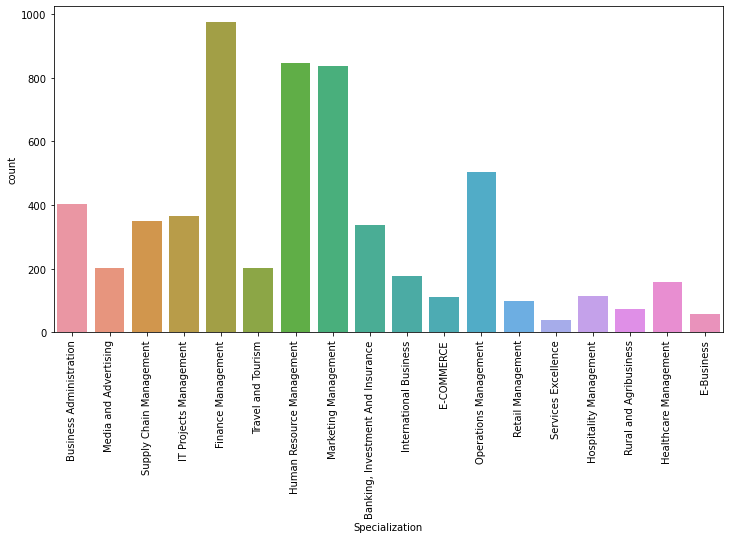

In [29]:
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'])
plt.xticks(rotation = 90)
plt.show()

Since the lead has not filled in a particular Specialization assuming it would be one among known could be bad. Hence creating a category called 'Others' to impute the null values.

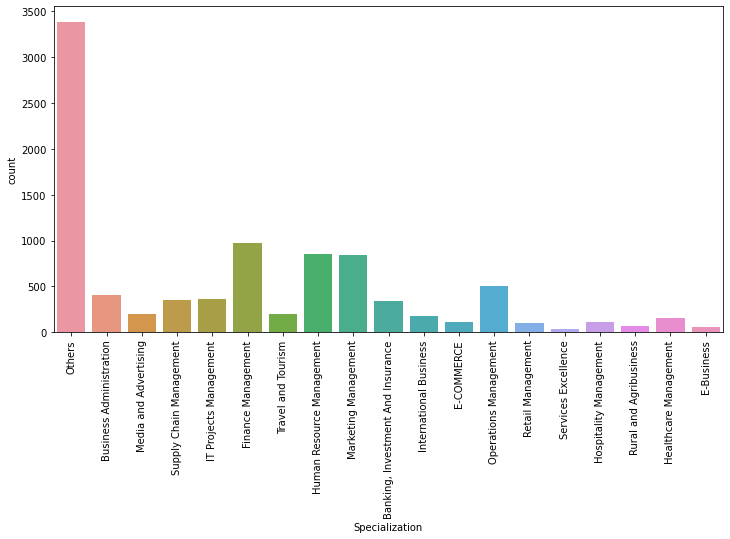

In [30]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'])
plt.xticks(rotation = 90)
plt.show()

##### What matters most to you in choosing a course

In [31]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

This column is highly skewed and hence not recommended to keep it for analysis. Dropping the column

In [32]:
lead.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [33]:
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Assuming the null values belong under unemployed would skew the data, hence considering it as Unknown

In [34]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')

##### Country

In [35]:
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [36]:
# more than 95% of the leads are from the same country. hence dropping the column as the variance is less
lead.drop('Country', axis=1, inplace=True)

##### Last Activity

In [37]:

lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [38]:
# replacing null with the most frequent activity "Email Opened".
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')

##### Lead Source

In [39]:
lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [40]:
# Combining Google and google as Google and replace null with the same as it is most frequent.
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

##### Total Visits

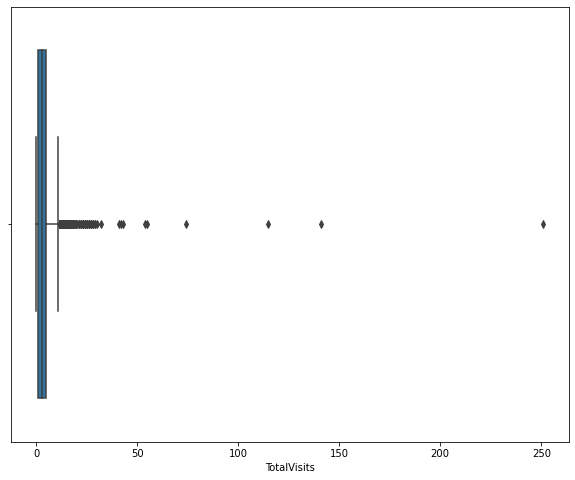

In [41]:
plt.figure(figsize = (10,8))
sns.boxplot(lead['TotalVisits'])
plt.show()

In [42]:
# since there are outliers, we can replace the null values with median instead of mean as it might give skewed results
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

##### Page Views Per Visit

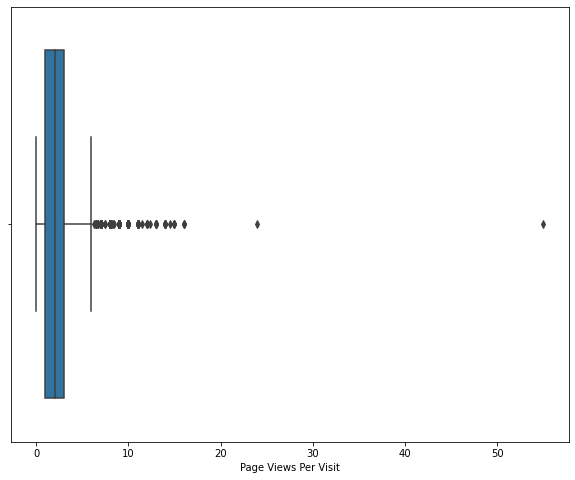

In [43]:
plt.figure(figsize = (10,8))
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [44]:
# since there are outliers, we can replace the null values with median instead of mean as it might give skewed results
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

In [45]:
lead.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

## EDA

In [46]:
converted_ratio = lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted_ratio

,counts
unique_values,
0,5679
1,3561


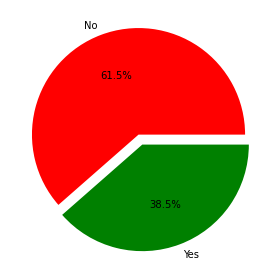

In [47]:
plt.pie(converted_ratio.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%', explode=(0.05,0.05))
plt.tight_layout()
plt.show()

- It appears that the column is balanced.

#### Univariate Analysis - Categorical

In [48]:
lead.rename(columns={'What is your current occupation': 'Occupation'}, inplace = True)

In [49]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

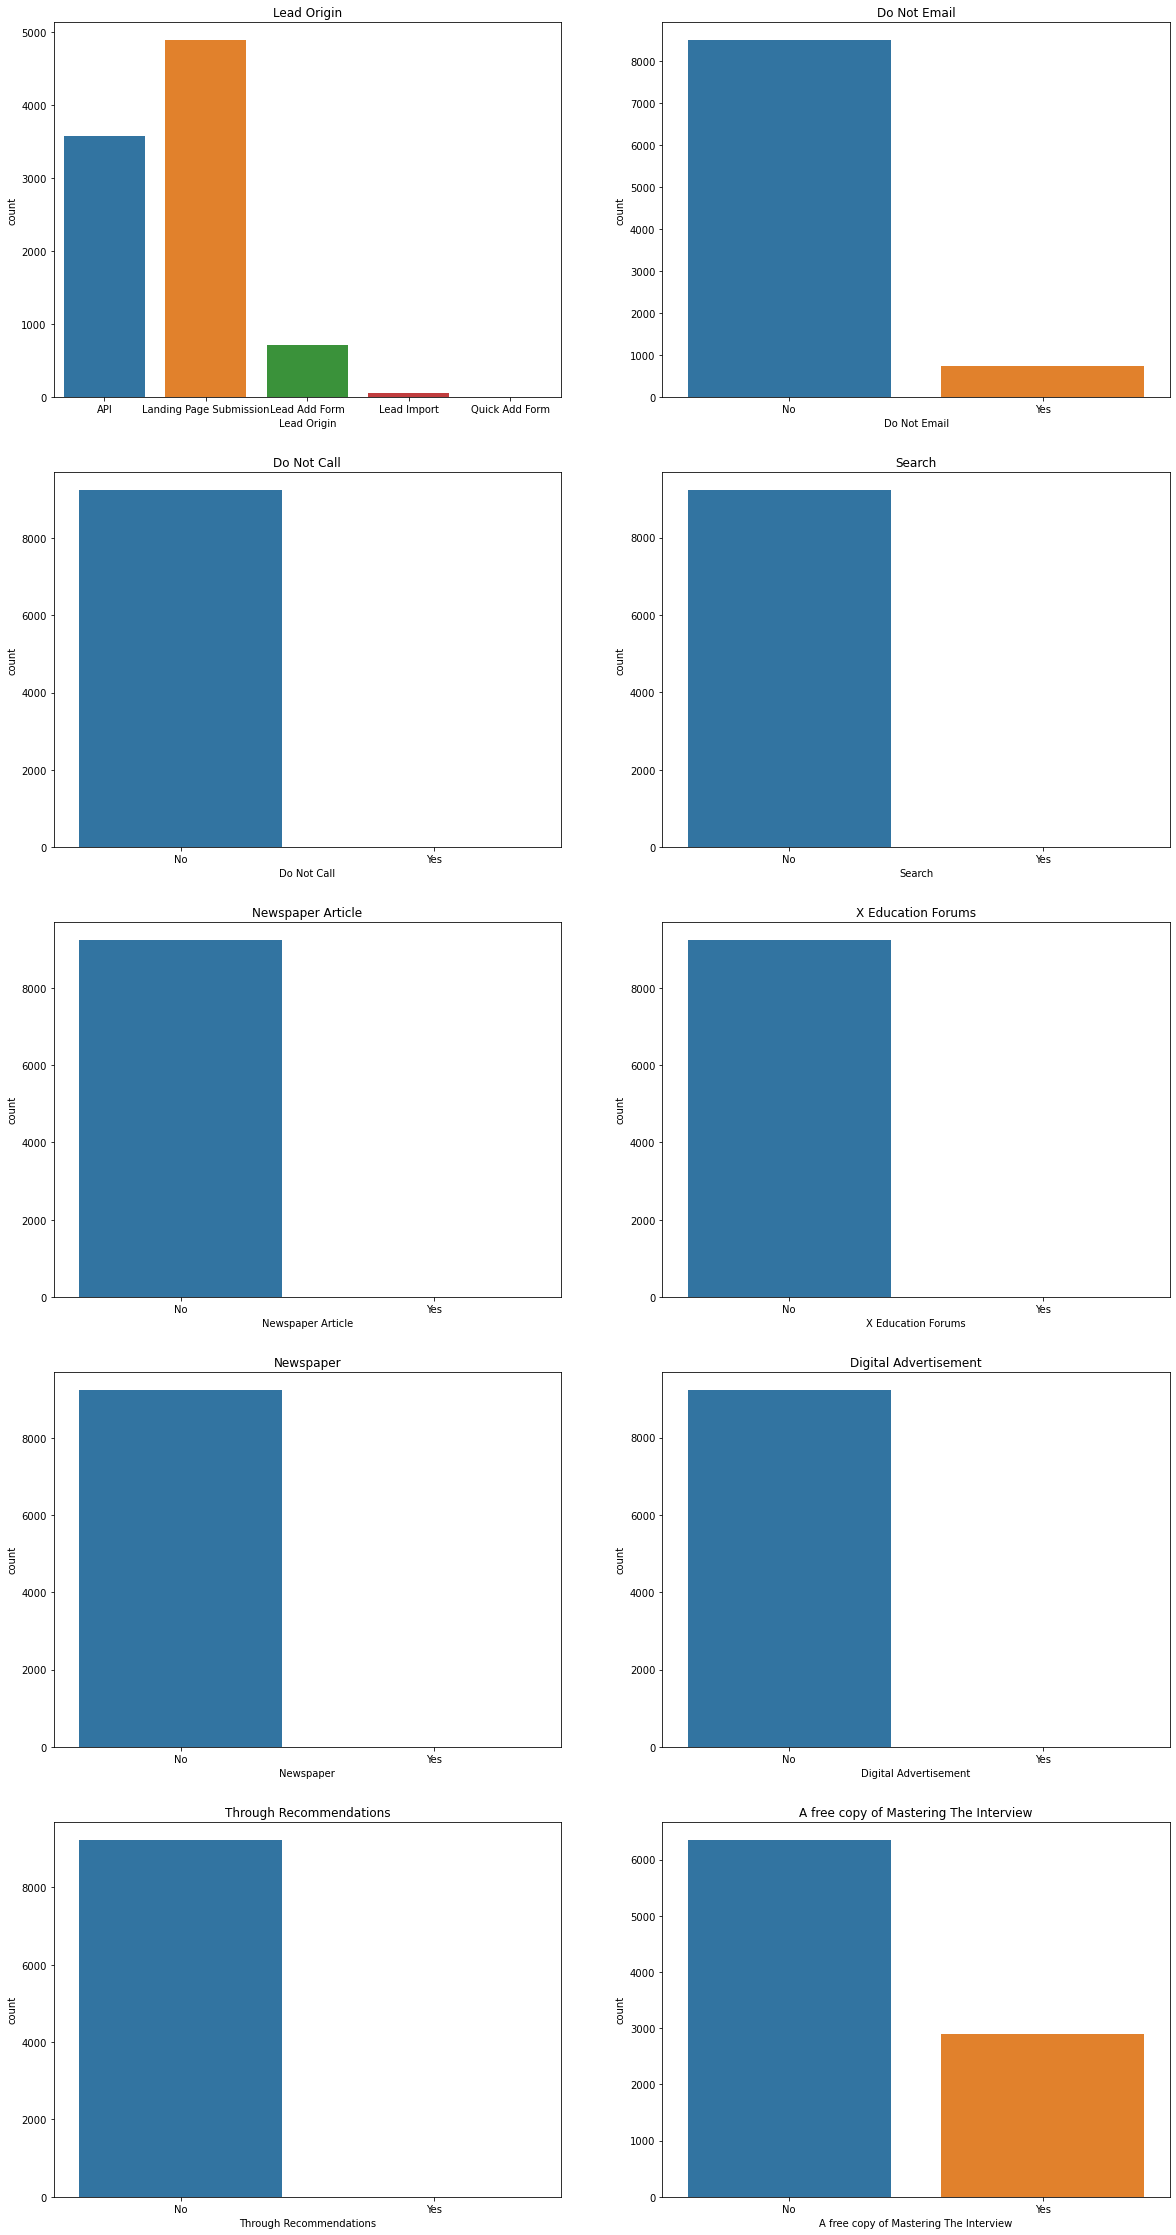

In [50]:
plt.figure(figsize = (20,40))

plt.subplot(5,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(5,2,2)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(5,2,3)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')


plt.subplot(5,2,4)
sns.countplot(lead['Search'])
plt.title('Search')

plt.subplot(5,2,5)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(5,2,6)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(5,2,7)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(5,2,8)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(5,2,9)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(5,2,10)
sns.countplot(lead['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.show()

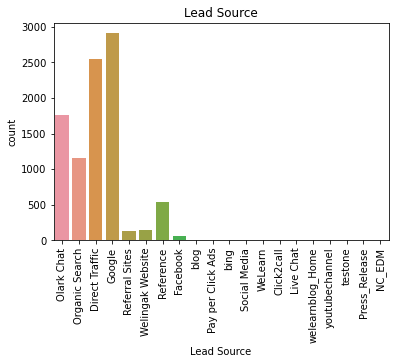

In [51]:
sns.countplot(lead['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [52]:
# Combining smaller sources as Others
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

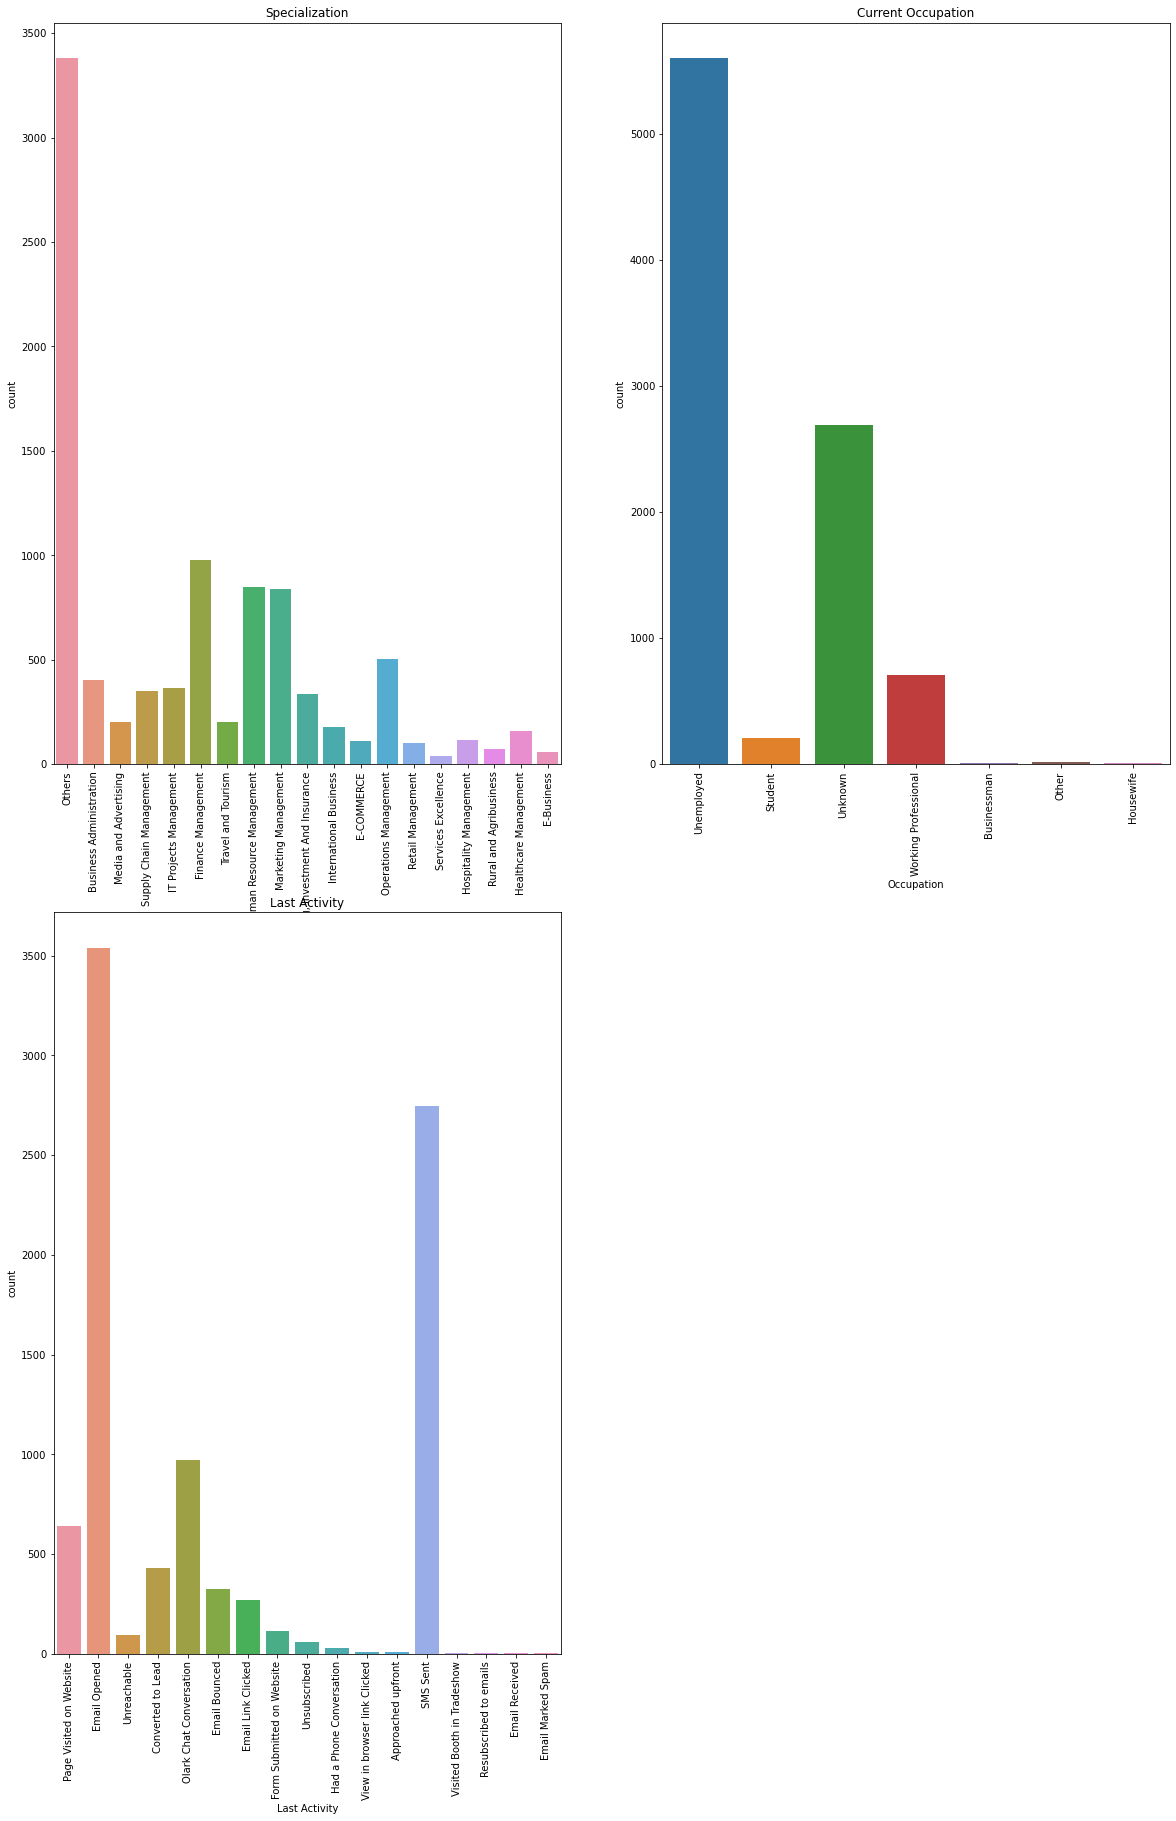

In [53]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(lead['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(lead['Occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(lead['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

In [54]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

###### Lead Origin
- Most Leads originated from submissions on the landing page and around 38% of those are converted followed by API, where around 30% are converted.
- Even though Lead Origins from Quick Add Form are 100% Converted, there was just 1 lead from that category. Leads from the Lead Add Form are the next highest conversions in this category at around 90% of 718 leads.
- Lead Import are very less in count and conversion rate is also the lowest.

###### Lead Source
- The source of most leads was Google, and 40% of the leads converted, followed by Direct Traffic,Organic search and Olark chat where around 35%, 38% and 30% converted respectively.
- A lead that came from a reference has over 90% conversion from the total of 534.
- Welingak Website has almost 100% lead conversion rate but the number of people visiting was very less

###### Last Activity
- Most of the lead have their Email opened as their last activity
- After combining smaller Last Activity types as Other Activity, the lead conversion is very high.
- Conversion rate for leads with last activity as SMS Sent is almost 60%

###### Specialization
- Most of the leads have not mentioned a specialization and around 28% of those converted
- Leads with Finance management and Marketing Management - Over 45% Converted.

###### Occupation
- Though Housewives are less in numbers, they have 100% conversion rate
- Working professionals, Businessmen and Other category have high conversion rate
- Though Unemployed people have been contacted in the highest number, the conversion rate is low 

###### Do not Email
- Majority of the people are ok with receiving email (~92%)
- People who are ok with email has conversion rate of 40%
- People who have opted out of receive email has lower rate of conversion (only 15%)

In [55]:
def pieplot(col):
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.1f%%',explode=(0.05,0.05))
    plt.title(col)

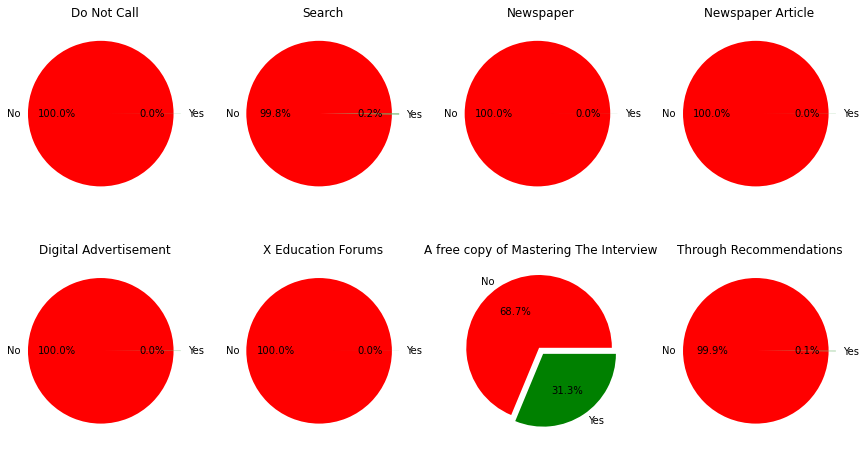

In [56]:
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'A free copy of Mastering The Interview','Through Recommendations']
plt.figure(figsize = (15,8))
i=1
for x in col:
    plt.subplot(2,4,i)
    pieplot(x)
    i+=1

- Columns Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Through Recommendations are very skewed and can be deleted as they will not add any value to the model.
- Distributing Free-Copy of Mastering Interview doesn't seem to add much value as the coenversion rate is almost same. Hence dropping the columns.

In [57]:
lead.drop(col, axis=1, inplace=True)

In [58]:
lead.shape

(9240, 10)

#### Univariate Analysis - Numerical

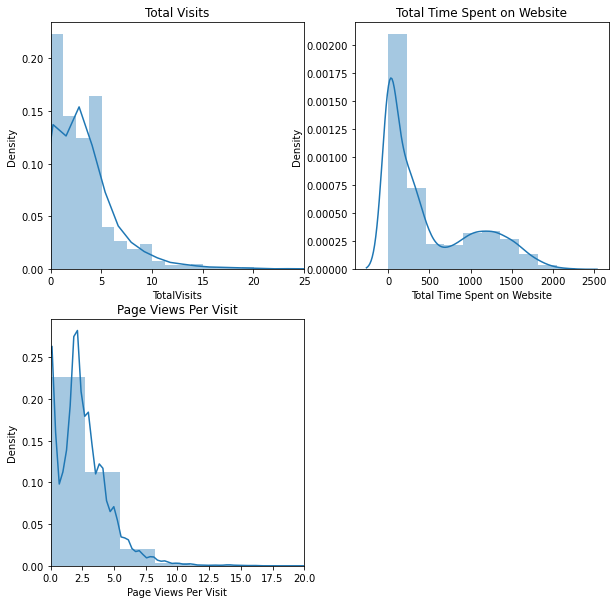

In [59]:
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.distplot(lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.distplot(lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.distplot(lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

- TotalVisits and Page Views per Visit has some outliers which needs to be treated.
- The features are not normally distributed

#### Bivariate Analysis

<Figure size 1440x1440 with 0 Axes>

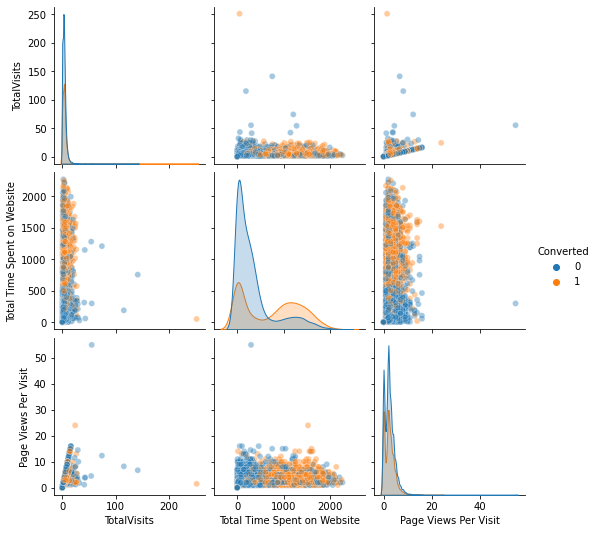

In [60]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[num_col],hue="Converted",kind='scatter', plot_kws={'alpha':0.4})                                  
plt.show()

As understood before the distribution of data is not normal.

### Data Preparation

##### Outliers

In [61]:
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [62]:
num_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

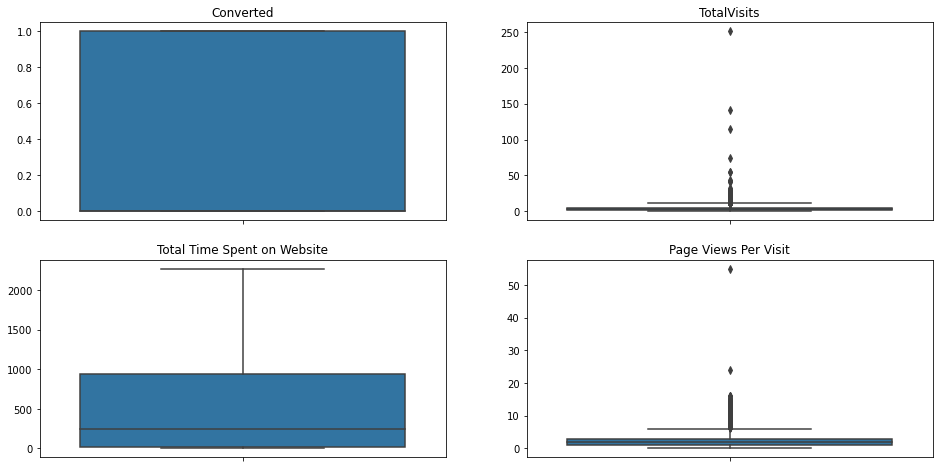

In [63]:
i=1
plt.figure(figsize=[16,8])
for col in num_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

- Capping the TotalVisits and Page Views Per Visit to their 95 th percentile due to following reasons:
    - Data set is fairly high number
    - 95th percentile and 99th percentile of these columns are very close and hence impact of capping to 95th or 99th percentile will be the same

In [64]:
P95 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
lead.loc[lead['TotalVisits'] >= P95, 'TotalVisits'] = P95 # outlier capping

P95 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
lead.loc[lead['Page Views Per Visit'] >= P95, 'Page Views Per Visit'] = P95 # outlier capping

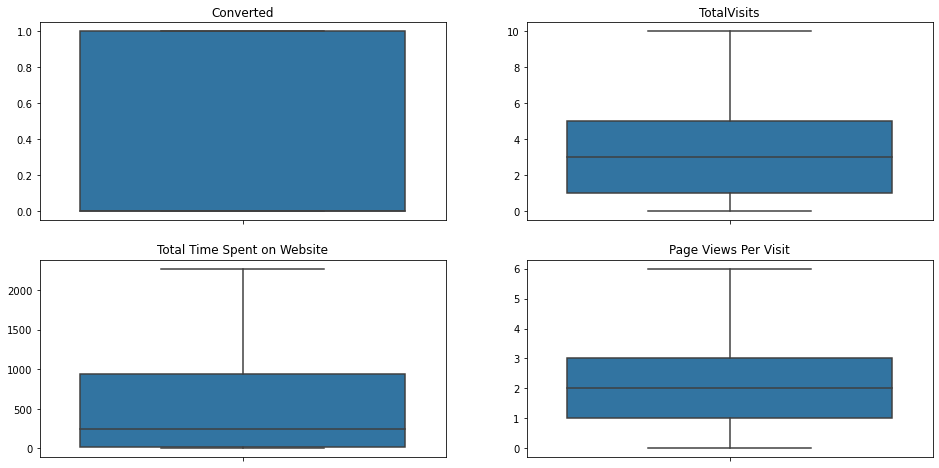

In [65]:
i=1
plt.figure(figsize=[16,8])
for col in num_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

##### Mapping Yes/No to 0/1

In [66]:
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
TotalVisits                      11
Last Activity                    11
Specialization                   19
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [67]:
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [68]:
lead['Do Not Email'] = lead['Do Not Email'].map({'Yes': 1, "No": 0})

In [69]:
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [70]:
lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

### Creating Dummies

In [71]:
dummies = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummies], axis=1)

lead.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0


In [72]:
# Since we created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

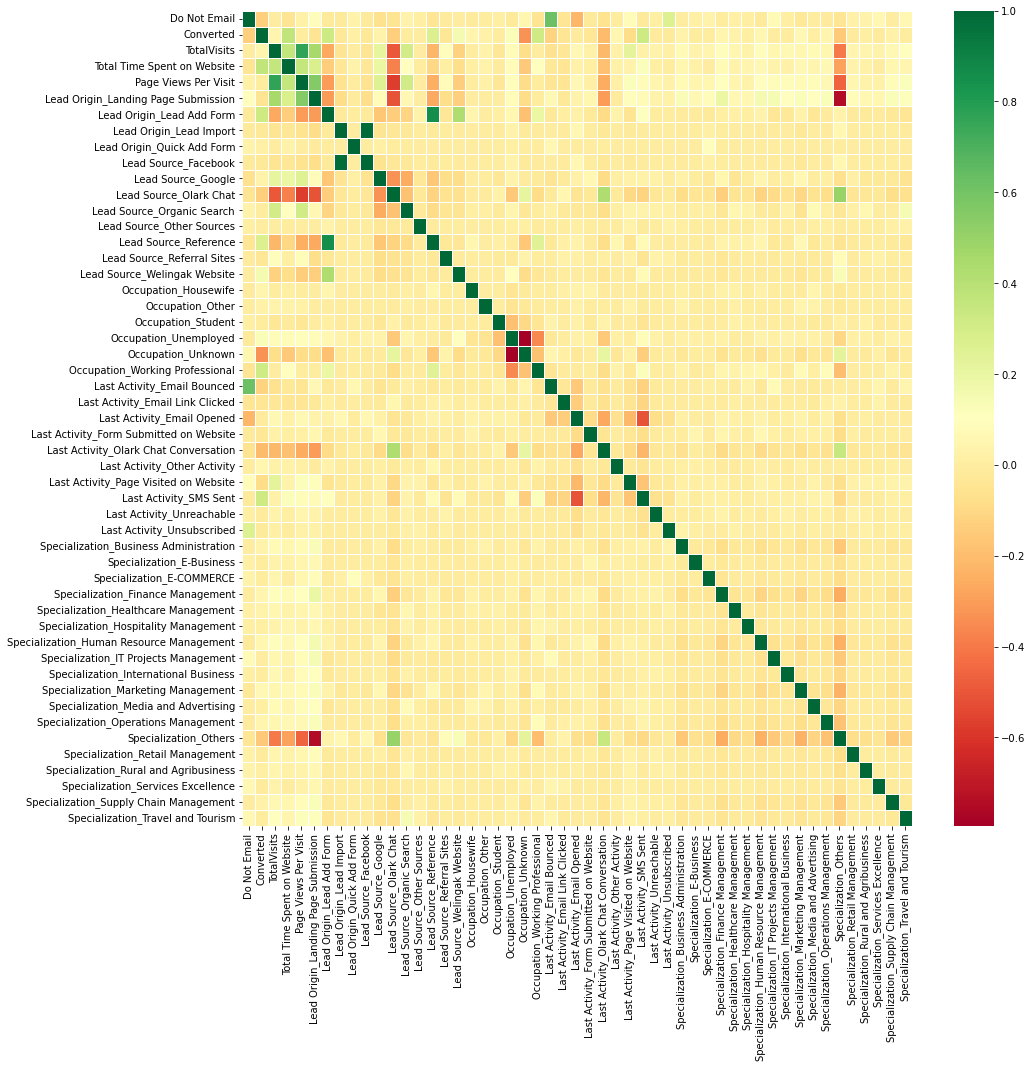

In [73]:
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [74]:
len(lead.columns)

51

### Train - Test Split

In [75]:
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [76]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


### Feature Scaling

In [77]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Model Building

In [78]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other Sources', False, 3),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 7),
 ('Occupation_Student', False, 9),
 ('Occupation_Unemployed', False, 8),
 ('Occupation_Unknown', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('La

In [80]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

In [81]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'S

#### Manual Feature Elimination

For Manual Feature Reduction, the following methods will be followed in order to reduce the features until we reach reasonable amount of feature count and maintain Sensitivity of the modeal =>80%
- High P-Value
- High VIF
- High negative GLM coeeficient
- Low Information Value (IV) generated based on WoE (Weight of Evidence)

In [82]:
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

###### Model1

In [83]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Tue, 14 Jun 2022   Deviance:                       5200.9
Time:                        00:31:08   Pearson chi2:                 8.03e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7869      0.150     -5.233      0.000      -1.082      -0.492
Do Not Email                             -1.1731      0.182     -6.435      0.000      -1.530      -0.816
Total Time Spent on Website               1.0654      0.040     26.623      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0426      0.129     -8.058      0.000      -1.296      -0.789
Lead Origin_Lead Add Form                 2.7686      0.204     13.566      0.000       2.369       3.169
Lead Source_Facebook                     -0.6626      0.523     -1.267      0.205      -1.687       0.362
Lead Source_Olark Chat                    1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website              2.4808      0.750      3.309      0.001       1.011       3.950
Occupation_Housewife                     22.7618   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -1.0783      0.088    -12.306      0.000      -1.250      -0.907
Occupation_Working Professional           2.4080      0.190     12.683      0.000       2.036       2.780
Last Activity_Email Opened                0.7348      0.110      6.660      0.000       0.519       0.951
Last Activity_Olark Chat Conversation    -0.6021      0.192     -3.141      0.002      -0.978      -0.226
Last Activity_Other Activity              2.2497      0.488      4.608      0.000       1.293       3.207
Last Activity_SMS Sent                    1.8816      0.112     16.847      0.000       1.663       2.100
Last Activity_Unreachable                 0.8678      0.368      2.361      0.018       0.147       1.588
Last Activity_Unsubscribed                1.3689      0.484      2.829      0.005       0.421       2.317
Specialization_Hospitality Management    -0.9777      0.328     -2.978      0.003      -1.621      -0.334
Specialization_Others                    -0.9752      0.124     -7.870      0.000      -1.218      -0.732
Specialization_Retail Management         -0.4160      0.337     -1.236      0.217      -1.076       0.244
Specialization_Rural and Agribusiness     0.5288      0.390      1.357      0.175      -0.235       1.293
=========================================================================================================
"""

In [84]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
19,Occupation_Unemployed,38.68
20,Occupation_Unknown,19.85
5,Lead Origin_Lead Add Form,17.14
6,Lead Origin_Lead Import,16.90
8,Lead Source_Facebook,16.86
44,Specialization_Others,14.44
13,Lead Source_Reference,14.08
24,Last Activity_Email Opened,10.05
4,Lead Origin_Landing Page Submission,8.48
29,Last Activity_SMS Sent,8.16


###### Model2 

Dropping Occupation_Housewife due to higher p-value

In [85]:
features.remove('Occupation_Housewife') 
log_model2, X_train_sm2 = build_logistic_model(features) 
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Tue, 14 Jun 2022   Deviance:                       5214.0
Time:                        00:31:12   Pearson chi2:                 8.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7773      0.150     -5.180      0.000      -1.071      -0.483
Do Not Email                             -1.1788      0.182     -6.468      0.000      -1.536      -0.822
Total Time Spent on Website               1.0644      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission      -1.0381      0.129     -8.029      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                 2.7849      0.204     13.661      0.000       2.385       3.184
Lead Source_Facebook                     -0.6639      0.523     -1.270      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0818      0.124      8.740      0.000       0.839       1.324
Lead Source_Welingak Website              2.4637      0.750      3.286      0.001       0.994       3.933
Occupation_Unknown                       -1.0822      0.088    -12.359      0.000      -1.254      -0.911
Occupation_Working Professional           2.3994      0.190     12.643      0.000       2.027       2.771
Last Activity_Email Opened                0.7327      0.110      6.663      0.000       0.517       0.948
Last Activity_Olark Chat Conversation    -0.6074      0.192     -3.171      0.002      -0.983      -0.232
Last Activity_Other Activity              2.2402      0.488      4.588      0.000       1.283       3.197
Last Activity_SMS Sent                    1.8716      0.111     16.805      0.000       1.653       2.090
Last Activity_Unreachable                 0.8567      0.368      2.331      0.020       0.136       1.577
Last Activity_Unsubscribed                1.3645      0.484      2.820      0.005       0.416       2.313
Specialization_Hospitality Management    -0.9849      0.328     -3.000      0.003      -1.628      -0.341
Specialization_Others                    -0.9793      0.124     -7.907      0.000      -1.222      -0.737
Specialization_Retail Management         -0.4224      0.336     -1.256      0.209      -1.082       0.237
Specialization_Rural and Agribusiness     0.5204      0.390      1.336      0.182      -0.243       1.284
=========================================================================================================
"""

In [86]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.00
16,Specialization_Others,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


###### Model3

Dropping Specialization_Retail Management due to higher p-value.

In [87]:
features.remove('Specialization_Retail Management') 
log_model3, X_train_sm3 = build_logistic_model(features) 
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Tue, 14 Jun 2022   Deviance:                       5215.6
Time:                        00:31:12   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                             -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                 2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                     -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website              2.4644      0.750      3.287      0.001       0.995       3.934
Occupation_Unknown                       -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Occupation_Working Professional           2.3991      0.190     12.636      0.000       2.027       2.771
Last Activity_Email Opened                0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation    -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activity              2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                    1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                 0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management    -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Others                    -0.9745      0.124     -7.869      0.000      -1.217      -0.732
Specialization_Rural and Agribusiness     0.5275      0.389      1.354      0.176      -0.236       1.291
=========================================================================================================
"""

In [88]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
16,Specialization_Others,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


###### Model4

In [89]:
features.remove('Lead Source_Facebook') 
log_model4, X_train_sm4 = build_logistic_model(features) 
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Tue, 14 Jun 2022   Deviance:                       5217.4
Time:                        00:31:12   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                             -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                    1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website              2.4624      0.750      3.284      0.001       0.993       3.932
Occupation_Unknown                       -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Occupation_Working Professional           2.3977      0.190     12.633      0.000       2.026       2.770
Last Activity_Email Opened                0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation    -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activity              2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                    1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                 0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management    -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Others                    -0.9715      0.124     -7.861      0.000      -1.214      -0.729
Specialization_Rural and Agribusiness     0.5291      0.390      1.358      0.174      -0.234       1.293
=========================================================================================================
"""

In [90]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


Dropping Specialization_Rural and Agribusiness because of higher p-value.

###### Model5

In [91]:
features.remove('Specialization_Rural and Agribusiness') 
log_model5, X_train_sm5 = build_logistic_model(features) 
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Tue, 14 Jun 2022   Deviance:                       5219.2
Time:                        00:31:13   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                             -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website               1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                    1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website              2.4629      0.750      3.285      0.001       0.993       3.932
Occupation_Unknown                       -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Occupation_Working Professional           2.3966      0.190     12.627      0.000       2.025       2.769
Last Activity_Email Opened                0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation    -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activity              2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                    1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                 0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management    -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Others                    -0.9785      0.123     -7.927      0.000      -1.220      -0.737
=========================================================================================================
"""

In [92]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


### Model Evaluation

Defining a function to calcualte and print sensitivity, specificity and accuracy

In [93]:
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy               = ", round(accuracy*100,2),"%")
    print ("Model Sensitivity            = ", round(sensi*100,2),"%")
    print ("Model Specificity            = ", round(speci*100,2),"%")
    print ("Model Precision              = ", round(precision*100,2),"%")
    print ("Model Recall                 = ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       = ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      = ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction     = ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction    = ", round(neg_pred_val*100,2),"%")

### Prediction

In [94]:
# Getting the predicted values on the train set
y_train_pred =log_model5.predict( X_train_sm5)
y_train_pred[:10]

1871    0.523486
6795    0.113305
3516    0.336733
8105    0.818686
3934    0.292254
4844    0.988274
3297    0.134427
8071    0.998294
987     0.099210
7423    0.900311
dtype: float64

In [95]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52348619, 0.113305  , 0.33673309, 0.81868625, 0.292254  ,
       0.9882738 , 0.13442727, 0.99829399, 0.09920971, 0.90031134])

In [96]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect
0,0,0.523486,1871
1,0,0.113305,6795
2,0,0.336733,3516
3,0,0.818686,8105
4,0,0.292254,3934


Task is to find Optimal Cutoff Point. Creating columns with different porbability cut offs.

In [97]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.523486,1871,1,1,1,1,1,1,0,0,0,0
1,0,0.113305,6795,1,1,0,0,0,0,0,0,0,0
2,0,0.336733,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.818686,8105,1,1,1,1,1,1,1,1,1,0
4,0,0.292254,3934,1,1,1,0,0,0,0,0,0,0


In [98]:
# Caluculating accuracy, specificity and sensitivity for these cut-offs 
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.632653,0.973236,0.422789,0.509554,0.973236
0.2,0.2,0.763760,0.916058,0.669915,0.631006,0.916058
0.3,0.3,0.800402,0.848743,0.770615,0.695118,0.848743
0.4,0.4,0.817718,0.775345,0.843828,0.753646,0.775345
0.5,0.5,0.818955,0.709246,0.886557,0.793917,0.709246
0.6,0.6,0.804267,0.613950,0.921539,0.828228,0.613950
0.7,0.7,0.785250,0.525142,0.945527,0.855915,0.525142
0.8,0.8,0.764069,0.431468,0.969015,0.895623,0.431468
0.9,0.9,0.713358,0.266423,0.988756,0.935897,0.266423


<Figure size 1296x720 with 0 Axes>

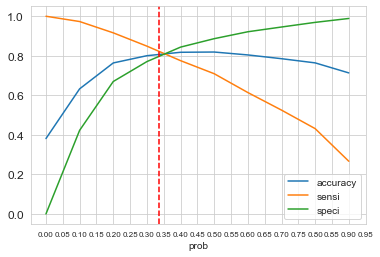

In [99]:
# Now that we have the accuracy, sensitivity and specificity for various probabilities, we can plot them
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

From the above graph, 0.335 seems to be an ideal cut-off

In [100]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect,final_predicted_1
0,0,0.523486,1871,1
1,0,0.113305,6795,0
2,0,0.336733,3516,1
3,0,0.818686,8105,1
4,0,0.292254,3934,0


In [101]:
#Assinging lead_score 
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted,Converted_Prob,Prospect,final_predicted_1,lead_score_1
3115,1,0.999473,2656,1,99
4891,1,0.999463,8074,1,99
1229,0,0.999170,8057,1,99
6312,1,0.999102,3428,1,99
6187,1,0.998930,7579,1,99
...,...,...,...,...,...
2016,0,0.004609,976,0,0
4946,0,0.004449,3300,0,0
3282,0,0.004097,5381,0,0
1457,0,0.003618,5279,0,0


#### Confusion Matrix

In [102]:
# Function for Confusion Matrix :
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted ) 
    sns.heatmap(cm, annot=True, fmt='.0f',
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()

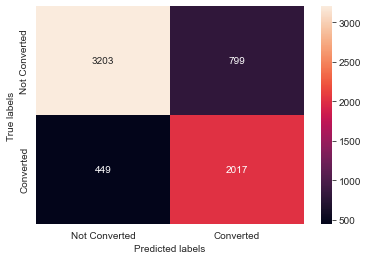

In [103]:
draw_cm( y_train_pred_final['Converted'], y_train_pred_final['final_predicted_1'],)

In [104]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_1'] )
#passing the confusion matrix to the previously defined function to calculate accuracy, sencitivity and specificity
lg_metrics(conf_matrix)

Model Accuracy               =  80.71 %
Model Sensitivity            =  81.79 %
Model Specificity            =  80.03 %
Model Precision              =  71.63 %
Model Recall                 =  81.79 %
Model True Positive Rate (TPR)       =  81.79 %
Model False Positive Rate (FPR)      =  19.97 %
Model Poitive Prediction     =  71.63 %
Model Negative Prediction    =  87.71 %


In [105]:
# Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted'], y_train_pred_final['final_predicted_1'] ) )

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4002
           1       0.72      0.82      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.81      0.81      6468



In [106]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_1'])))

F1 Score: 0.7637258614161304


#### ROC Curve

- Shows the tradeoff between sensitivity and specificity
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

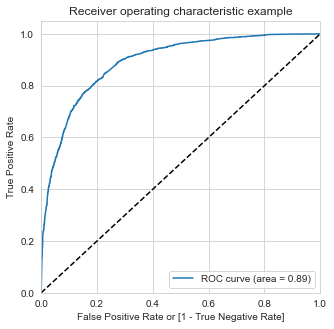

In [109]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Since the area under ROC is 0.89, we can say that the model is good

### Precision and Recall

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

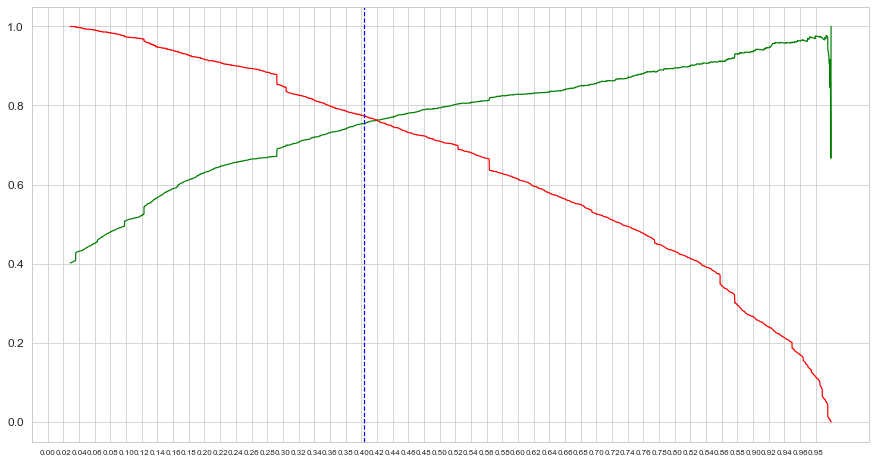

In [111]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

In [112]:
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect,final_predicted_1,lead_score_1,final_predicted_2
0,0,0.523486,1871,1,52,1
1,0,0.113305,6795,0,11,0
2,0,0.336733,3516,1,33,0
3,0,0.818686,8105,1,81,1
4,0,0.292254,3934,0,29,0


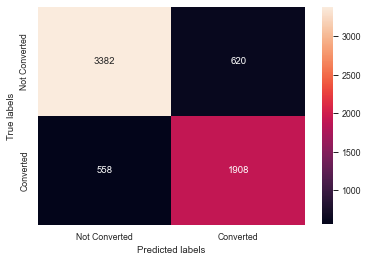

In [113]:
draw_cm( y_train_pred_final['Converted'], y_train_pred_final['final_predicted_2'])

In [114]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

Model Accuracy               =  81.79 %
Model Sensitivity            =  77.37 %
Model Specificity            =  84.51 %
Model Precision              =  75.47 %
Model Recall                 =  77.37 %
Model True Positive Rate (TPR)       =  77.37 %
Model False Positive Rate (FPR)      =  15.49 %
Model Poitive Prediction     =  75.47 %
Model Negative Prediction    =  85.84 %


In [115]:
print( metrics.classification_report( y_train_pred_final['Converted'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4002
           1       0.75      0.77      0.76      2466

    accuracy                           0.82      6468
   macro avg       0.81      0.81      0.81      6468
weighted avg       0.82      0.82      0.82      6468



- True Positive number has decreased.
- True Negative number has increase
- False Negative number has increase
- False Positive number has decreased

#### Model Evaluation on test set

In [116]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [117]:
X_test = X_test[features]

In [118]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others'],
      dtype='object')

In [119]:
y_test_pred = log_model5.predict(X_test_sm)

In [120]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [121]:
# Putting CustID to index
y_test_df['Prospect'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect,0
0,1,4269,0.510782
1,1,2376,0.876272
2,1,7766,0.835646
3,0,9199,0.097968
4,1,4359,0.857860


In [122]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect,Converted,Converted_Prob
0,4269,1,0.510782
1,2376,1,0.876272
2,7766,1,0.835646
3,9199,0,0.097968
4,4359,1,0.857860


Using Cutoff point of 0.335 from Sentivity - Specificity - Accuracy cut-off points

In [123]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Prospect,Converted,Converted_Prob,final_predicted
0,4269,1,0.510782,1
1,2376,1,0.876272,1
2,7766,1,0.835646,1
3,9199,0,0.097968,0
4,4359,1,0.857860,1


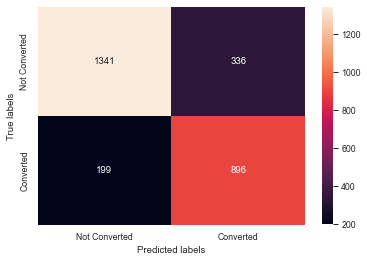

In [124]:
draw_cm( y_pred_final['Converted'], y_pred_final['final_predicted'])

In [125]:
conf_matrix = confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

Model Accuracy               =  80.7 %
Model Sensitivity            =  81.83 %
Model Specificity            =  79.96 %
Model Precision              =  72.73 %
Model Recall                 =  81.83 %
Model True Positive Rate (TPR)       =  81.83 %
Model False Positive Rate (FPR)      =  20.04 %
Model Poitive Prediction     =  72.73 %
Model Negative Prediction    =  87.08 %


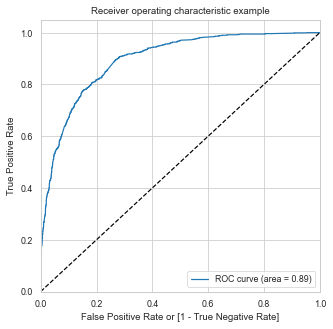

In [126]:
# ROC
draw_roc( y_pred_final['Converted'], y_pred_final['Converted_Prob'])

In [127]:
print( metrics.classification_report( y_pred_final['Converted'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1677
           1       0.73      0.82      0.77      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.81      0.81      0.81      2772



In [128]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect,Converted,Converted_Prob,final_predicted,lead_score
546,3478,1,0.999437,1,99
2405,5921,1,0.998986,1,99
1026,5671,1,0.998734,1,99
745,6383,1,0.998423,1,99
2589,7327,1,0.997860,1,99
...,...,...,...,...,...
17,3545,0,0.006371,0,0
2034,2454,0,0.003632,0,0
2521,8733,0,0.003427,0,0
597,3682,0,0.002866,0,0


- The lead_score can be used to identify which potential leads to prioritize first. 
- Higher the score, the higher chances are there for the lead to convert. 

### Conclusion

In [129]:
final_parameters = log_model5.params[1:]
final_parameters

Do Not Email                            -1.181079
Total Time Spent on Website              1.065077
Lead Origin_Landing Page Submission     -1.022735
Lead Origin_Lead Add Form                2.802910
Lead Source_Olark Chat                   1.099297
Lead Source_Welingak Website             2.462865
Occupation_Unknown                      -1.081804
Occupation_Working Professional          2.396583
Last Activity_Email Opened               0.728763
Last Activity_Olark Chat Conversation   -0.606781
Last Activity_Other Activity             2.241896
Last Activity_SMS Sent                   1.867202
Last Activity_Unreachable                0.848667
Last Activity_Unsubscribed               1.390614
Specialization_Hospitality Management   -0.995051
Specialization_Others                   -0.978476
dtype: float64

In [130]:
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                             -42.137603
Total Time Spent on Website               37.998967
Lead Origin_Landing Page Submission      -36.488332
Lead Origin_Lead Add Form                100.000000
Lead Source_Olark Chat                    39.219849
Lead Source_Welingak Website              87.868164
Occupation_Unknown                       -38.595762
Occupation_Working Professional           85.503385
Last Activity_Email Opened                26.000233
Last Activity_Olark Chat Conversation    -21.648255
Last Activity_Other Activity              79.984587
Last Activity_SMS Sent                    66.616569
Last Activity_Unreachable                 30.278082
Last Activity_Unsubscribed                49.613242
Specialization_Hospitality Management    -35.500645
Specialization_Others                    -34.909293
dtype: float64

<Figure size 864x576 with 0 Axes>

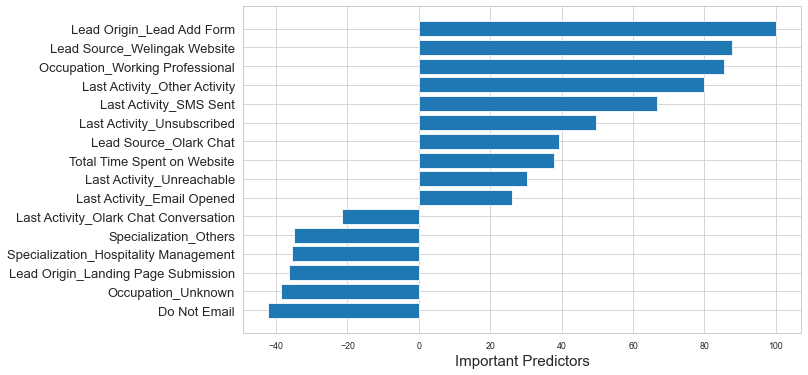

In [131]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Important Predictors', fontsize=15)
plt.show()

###### Major indicators that a lead will get converted to a hot lead:
- Lead Origin_Lead Add Form : A lead sourced from Lead Origin_Lead Add Form is more likely to get converted
- Occupation_Working Professional :- Working professionals are more likely to get converted.
- Lead_Source_Welingak website : A lead sourced from Welingak Website is more likely to get converted.
- Last Activity_SMS Sent :A lead having SMS sent previously are more likely to get converted.
- Lead Source_Olark Chat :A lead sourced from Olark Chat is more likely to get converted


###### Major indicators that a lead will NOT get converted to a hot lead:
- Last_Activity_Olark chat conversation : Customers under olark chat, are less likely to get converted into hot leads.
- Lead Ongin_Landmg Page Submission : Customers under Lead Ongin_Landmg Page Submission, are less likely to get converted into hot leads .
- Do Not Email : Customer who choose Do Not Email are less likely to get converted into hot leads .


###### Recommendations:
- The company should use a leads score threshold of 41 to identify "Hot Leads" as at this threshold, Sensitivity Score of the model is around 81% which is as good as CEO's target of 80%.